### ***Introduction***

***In my recent project, I worked with the Iris dataset, a classic in the field of machine learning. The task was to build a model to classify iris flowers based on their features. This dataset, with its simplicity and relevance, serves as an excellent foundation for machine learning fundamentals. This report outlines the steps taken, challenges faced, and the results achieved in constructing an accurate model for this dataset, highlighting key aspects of data science from preprocessing to model training. Join me in exploring the Iris dataset and the art of building a predictive model.***

In [40]:
# importing the modules
import pandas as pd
import numpy as np
import os
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# importing the iris dataset
from sklearn import datasets
from sklearn.datasets import load_iris

In [42]:
#assigning variable or instance to the iris
iris=load_iris()
#printing the iris dataset
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

## -->***data collection and preprocessing***

In [43]:
#pre processing the dataset --> converting into DATAFRAME
X=pd.DataFrame(iris.data,columns=iris.feature_names) # here i have given the X var to the features
y=pd.DataFrame(iris.target) # y var to the target
df=pd.concat([X,y],axis=1)

In [44]:
#renaming the column of as target
df.rename(columns={0:'target'},inplace=True)

In [45]:
#printing the first five column
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
#statistical measures before manipulating
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [47]:
#getting the value counts of each class
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [48]:
#checking for  the null values individually features/target
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [49]:
#checking for the duplicate values
df.duplicated().any()


True

In [50]:
#dropping those duplicate values
df.drop_duplicates(inplace=True)

<Axes: >

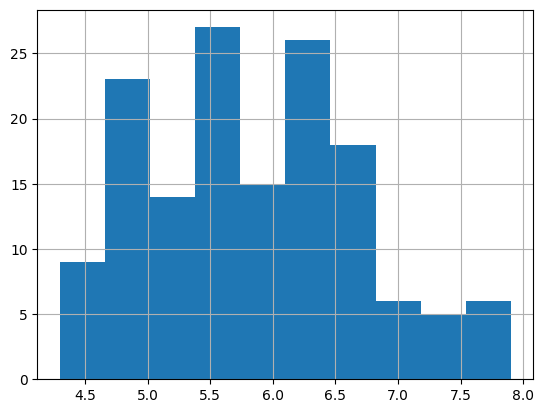

In [51]:
#exploratory data analysis
df['sepal length (cm)'].hist()

<Axes: >

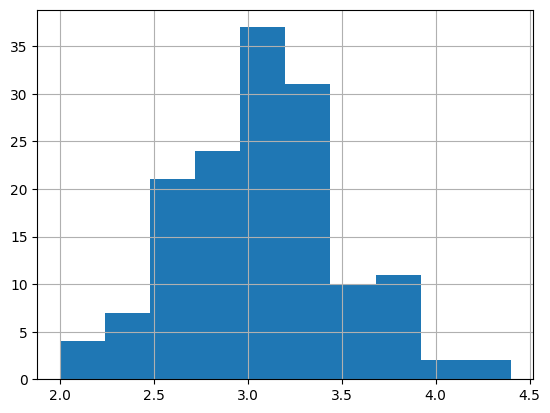

In [52]:
df['sepal width (cm)'].hist()

<Axes: >

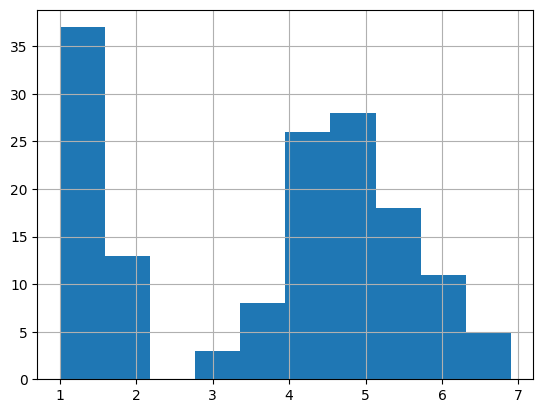

In [53]:
df['petal length (cm)'].hist()

<Axes: >

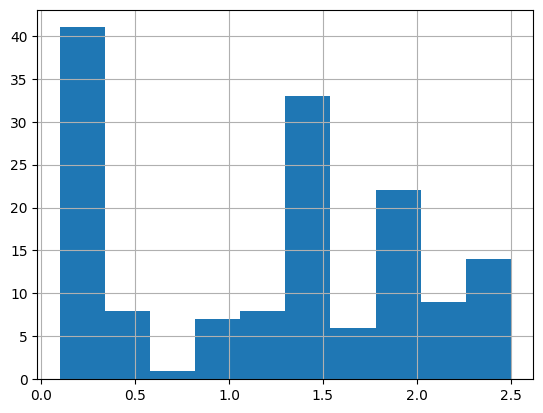

In [54]:
df['petal width (cm)'].hist()

#0--> Iris-Setosa
#1--> Iris-Versicolour
#2--> Iris-Virginica

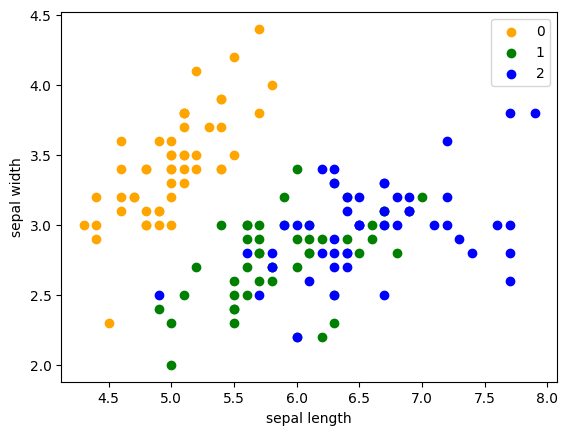

In [55]:
#scatter plot
colors=['orange','green','blue']
species=[0,1,2]

for i in range(3):
   x = df[df['target'] == species[i]]
   plt.scatter(x['sepal length (cm)'],x['sepal width (cm)'],c=colors[i],label=species[i])
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

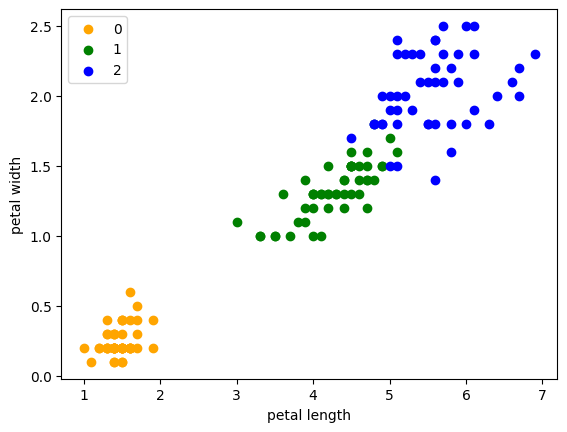

In [56]:
colors=['orange','green','blue']
species=[0,1,2]

for i in range(3):
   x = df[df['target'] == species[i]]
   plt.scatter(x['petal length (cm)'],x['petal width (cm)'],c=colors[i],label=species[i])
plt.legend()
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.show()

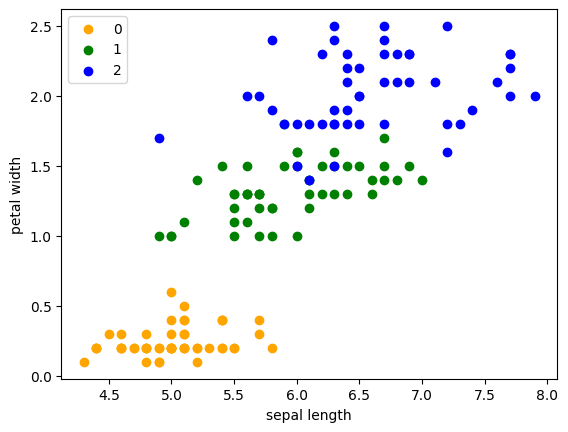

In [57]:
colors=['orange','green','blue']
species=[0,1,2]

for i in range(3):
   x = df[df['target'] == species[i]]
   plt.scatter(x['sepal length (cm)'],x['petal width (cm)'],c=colors[i],label=species[i])
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.show()

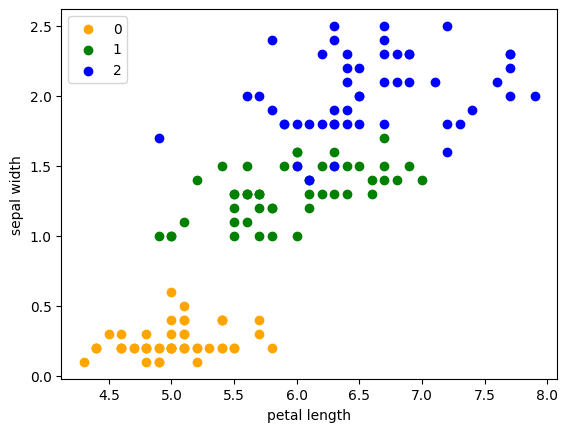

In [58]:
colors=['orange','green','blue']
species=[0,1,2]

for i in range(3):
   x = df[df['target'] == species[i]]
   plt.scatter(x['sepal length (cm)'],x['petal width (cm)'],c=colors[i],label=species[i])
plt.legend()
plt.xlabel('petal length')
plt.ylabel('sepal width')
plt.show()

In [59]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.118129,0.873738,0.820620,0.786971
sepal width (cm),-0.118129,1.000000,-0.426028,-0.362894,-0.422987
petal length (cm),0.873738,-0.426028,1.000000,0.962772,0.949402
petal width (cm),0.820620,-0.362894,0.962772,1.000000,0.956514
target,0.786971,-0.422987,0.949402,0.956514,1.000000


<Axes: >

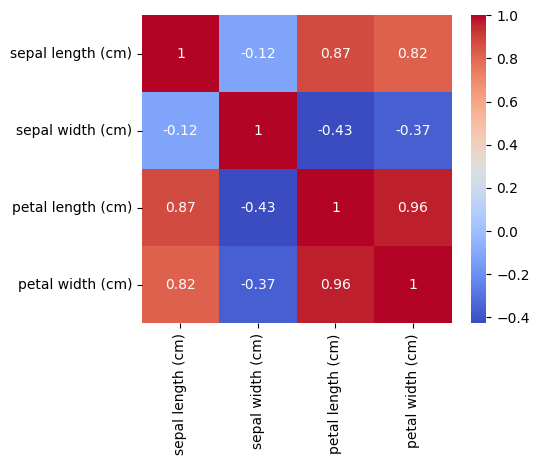

In [60]:
corr=X.corr()
plt.subplots(figsize=(5,4))
sns.heatmap(corr,annot=True,cmap='coolwarm')


In [61]:
#model training
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)


In [62]:
#getting the shape of training and testing data
X_train.shape


(120, 4)

In [63]:
X_test.shape

(30, 4)

In [64]:
print(y_test)

     0
47   0
3    0
31   0
25   0
15   0
118  2
89   1
6    0
103  2
65   1
88   1
38   0
92   1
53   1
140  2
40   0
72   1
135  2
113  2
42   0
126  2
112  2
141  2
76   1
5    0
109  2
134  2
67   1
57   1
86   1


In [65]:
y_test.shape


(30, 1)

### ***model-->logistic regression***

In [66]:
#importing our model logistic regression
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(X_train,y_train)
pred=clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
from sklearn.metrics import accuracy_score
print("accuracy",accuracy_score(y_test,pred)*100)

accuracy 100.0


In [68]:
#checking all the values
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [69]:
#accessing the performence of the model
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y_test,pred)
print(confusion_matrix)

[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]


## ***actual value***

In [70]:
print(y_test.to_string())

     0
47   0
3    0
31   0
25   0
15   0
118  2
89   1
6    0
103  2
65   1
88   1
38   0
92   1
53   1
140  2
40   0
72   1
135  2
113  2
42   0
126  2
112  2
141  2
76   1
5    0
109  2
134  2
67   1
57   1
86   1


## ***predicted value***

In [71]:
print(pred)

[0 0 0 0 0 2 1 0 2 1 1 0 1 1 2 0 1 2 2 0 2 2 2 1 0 2 2 1 1 1]


# ***conclusion***

### ***I successfully developed a machine learning model utilizing the renowned Iris dataset, implementing a logistic regression algorithm. The remarkable achievement of attaining a 100% accuracy rate underscores the model's proficiency in classifying iris species. However, it is essential to exercise caution when interpreting such high accuracy, as it could indicate potential overfitting or data leakage. Further investigation and validation on unseen data would be prudent to ensure the model's robustness and generalization capabilities in real-world applications. Nonetheless, this accomplishment serves as a promising foundation for future endeavors in machine learning and classification tasks***.




